<a href="https://colab.research.google.com/github/saincoder404/xeven_AI/blob/master/lecture_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Load required data and packages***

In [1]:
# load dataset
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

***Data Spliting***

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# Check the shape of the data
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (50000, 32, 32, 3) (50000, 1)
Testing data shape: (10000, 32, 32, 3) (10000, 1)


***Normalization***

In [4]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [5]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [6]:
X_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

***Class Names***

In [7]:
# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse',
               'ship', 'truck']

***Building a simple ANN model***

In [8]:
model = models.Sequential({
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
})

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


***Model Compilation***

In [9]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

***Model Training***

In [15]:
#training model
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_test, y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7553 - loss: 0.7293 - val_accuracy: 0.4407 - val_loss: 1.9745
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7845 - loss: 0.6513 - val_accuracy: 0.4399 - val_loss: 2.0910
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.8101 - loss: 0.5780 - val_accuracy: 0.4283 - val_loss: 2.2686
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - accuracy: 0.8312 - loss: 0.5136 - val_accuracy: 0.4154 - val_loss: 2.5057
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - accuracy: 0.8488 - loss: 0.4505 - val_accuracy: 0.4216 - val_loss: 2.6077
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8715 - loss: 0.3914 - val_accuracy: 0.4232 - val_loss: 2.7726
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8849 - loss: 0.3492 - val_accuracy: 0.4089 - val_loss: 2.9893
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9044 -

***Model Evaulation***

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 5ms/step - accuracy: 0.4530 - loss: 1.8191

Test accuracy: 0.453000009059906


***Data Visualization***

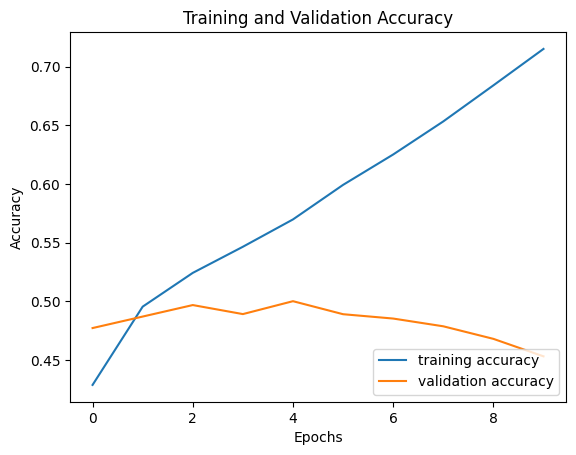

In [14]:
# plot training and validation accuracy
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

In [16]:
# prediction
predicitions = model.predict(X_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 974ms/step


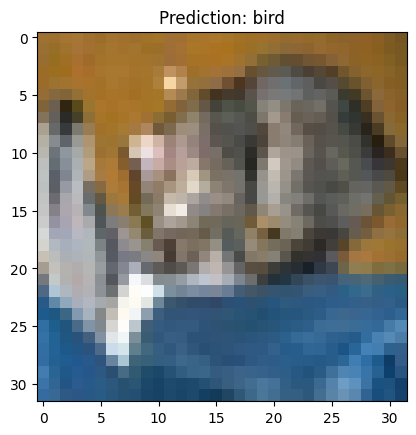

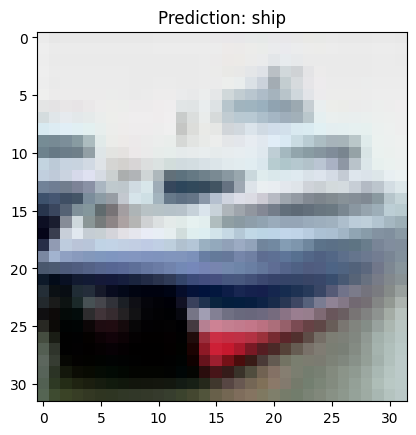

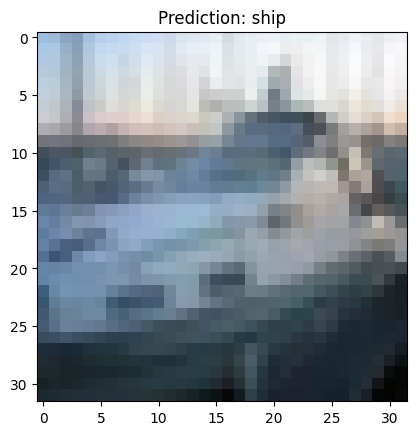

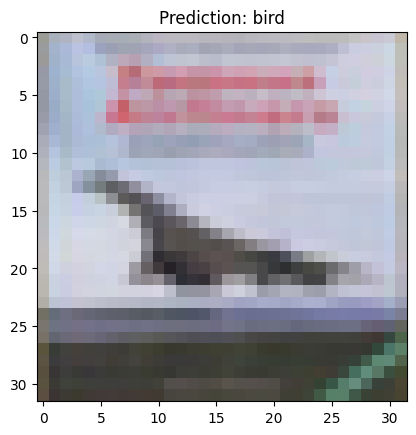

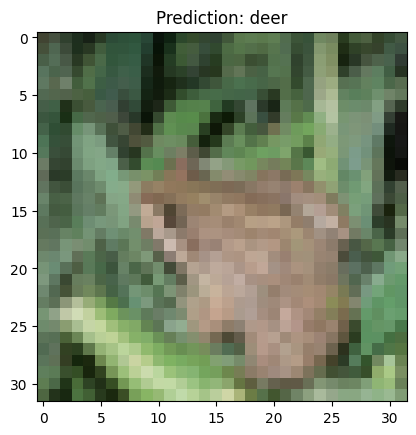

In [17]:
# Display the prediction images

for i in range(5):
  plt.figure()
  plt.imshow(X_test[i])
  plt.title(f"Prediction: {class_names[predicitions[i].argmax()]}")
  plt.show()